In [1]:
%matplotlib inline
import os
from tomato.audio.AudioAnalyzer import AudioAnalyzer
from tomato.symbolic.SymbTrAnalyzer import SymbTrAnalyzer
from tomato.joint.JointAnalyzer import JointAnalyzer
import pylab
pylab.rcParams['figure.figsize'] = (20, 8)


In [2]:
# score filepaths
symbtr_name = 'ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede'
txt_score_filepath = os.path.join(symbtr_name, symbtr_name + '.txt')
mu2_score_filepath = os.path.join(symbtr_name, symbtr_name + '.mu2')

# instantiate
audio_mbid = 'f970f1e0-0be9-4914-8302-709a0eac088e'
audio_filepath = os.path.join(symbtr_name, audio_mbid, audio_mbid + '.mp3')

# instantiate analyzer objects
scoreAnalyzer = SymbTrAnalyzer(verbose=True)
audioAnalyzer = AudioAnalyzer(verbose=True)
jointAnalyzer = JointAnalyzer(verbose=True)


You can use the single line call "analyze" of each analyzer object. The procedure below does all the analysis for the given audio and score pair.

In [3]:
# score analysis
score_features = scoreAnalyzer.analyze(
    txt_score_filepath, mu2_score_filepath, symbtr_name=symbtr_name)

# audio analysis
audio_features = audioAnalyzer.analyze(
    audio_filepath, makam=score_features['makam']['symbtr_slug'])

# joint analysis
joint_features, score_informed_audio_features = jointAnalyzer.analyze(
    txt_score_filepath, score_features, audio_filepath, audio_features['pitch'])

# redo some steps in audio analysis
score_informed_audio_features = audioAnalyzer.update_analysis(
    score_informed_audio_features)

# summarize all the features extracted from all sources
summarized_features = jointAnalyzer.summarize(
    audio_features, score_features, joint_features, score_informed_audio_features)


- Automatic phrase segmentation on the SymbTr-txt file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
- Extracting (meta)data from the SymbTr-txt file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.txt
- Extracting metadata from the SymbTr-mu2 file: ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede.mu2
- Getting relevant metadata of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Extracting predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Filtering predominant melody of ussak--sazsemaisi--aksaksemai----neyzen_aziz_dede/f970f1e0-0be9-4914-8302-709a0eac088e/f970f1e0-0be9-4914-8302-709a0eac088e.mp3
- Obtaining the melodic progression model of ussak

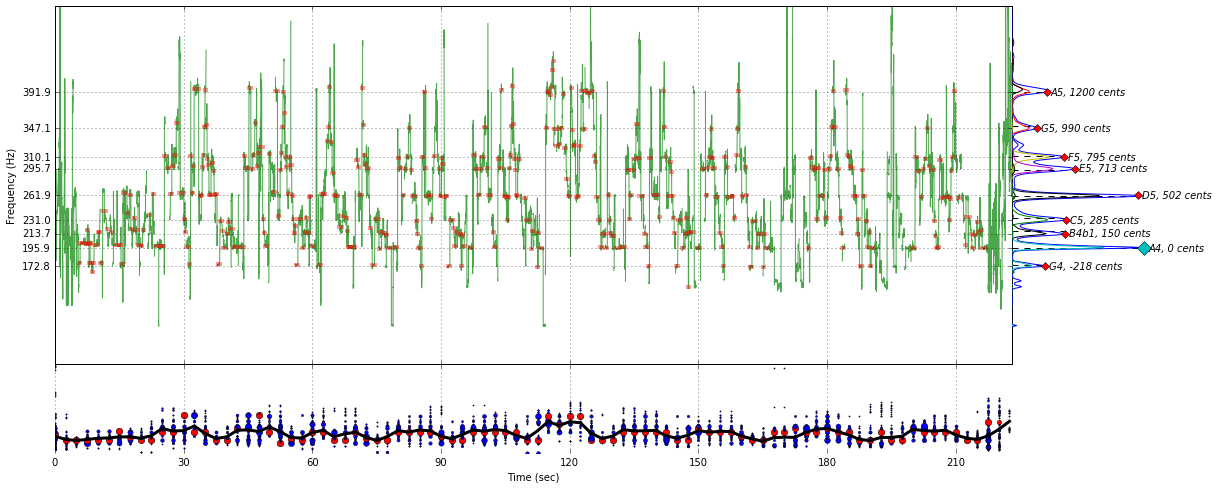

In [4]:
fig, ax = JointAnalyzer.plot(summarized_features)
ax[0].set_ylim([50, 500])
pylab.show()